### Постановка задачи
Обучение 3-х моделей

### Подключение модулей

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%matplotlib inline

### Загрузка данных

In [21]:
df = pd.read_csv('weather_classification_data.csv')

In [24]:
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
5       Cloudy  
6        Snowy  
7        Snowy  
8        Snowy  
9        Sunny

`Temperature` (numeric):(числовая): температура в градусах Цельсия, варьирующаяся от экстремально низкой до экстремально высокой температуры.тип.

`Humidity` (numeric): (числовая): Процент влажности, включая значения выше 100% для указания отклонений.   

`Wind Speed` (numeric): (числовая): Скорость ветра в километрах в час с диапазоном, включающим нереально высокие значения.   

`Precipitation` (%) (numeric):  (числовая): процентное содержание осадков, включая экстремальные значения.   

`Cloud Cover` (categorical): (категориальный): Описание облачного покрова.  

`Atmospheric` Pressure (numeric):  давление (числовое): Атмосферное давление в ГПа, охватывающее широкий диапазон. 

`UV Index` (numeric): (числовой): УФ-индекс, указывающий на интенсивность ультрафиолетового излучения.

`Season` (categorical): (категориальный): Сезон, в течение которого были записаны данные.   

`Visibility` (km) (numeric): (км) (числовая): Видимость в километрах, включая очень низкие или очень высокие значения. 

`Location` (categorical): (категориальное): Тип местоположения, в котором были записаны данные.   

`Weather Type` (categorical): (категориальное): Целевая переменная для кающее место положение записилаающая, где мы находи

### Описание данных таблицы

### Разведочный анализ данных (РАД, EDA)

Объём данных:

In [47]:
df.shape

(13200, 11)

Типы данных, приведенных данных

In [51]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [55]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

Проверка на не заполненые поля:

In [60]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [62]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

### Результат наблюдения таблица:
Обнаружены анамальные значения в колонке: Temperatura

In [85]:
new_f = df[df['Temperature'] == 109]
new_f

Temperature  Humidity  Wind Speed  Precipitation (%) Cloud Cover  \
5085        109.0        89         3.0               96.0       clear   

      Atmospheric Pressure  UV Index  Season  Visibility (km) Location  \
5085               1012.84        13  Spring              7.5   inland   

     Weather Type  
5085        Sunny

In [87]:
df['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

<Axes: xlabel='Location'>

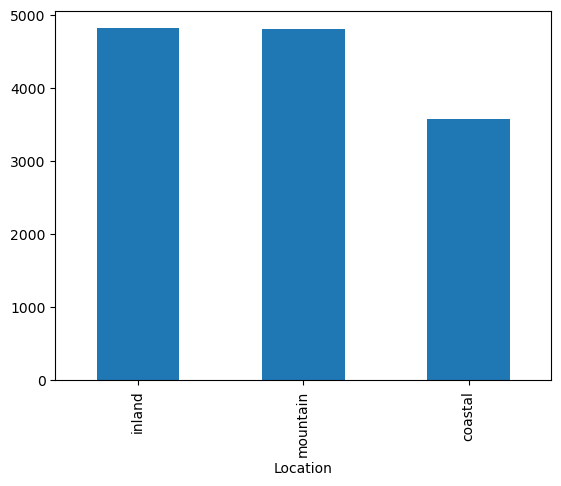

In [89]:
df['Location'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

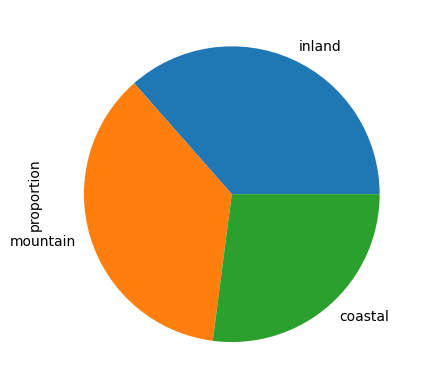

In [91]:
df['Location'].value_counts(normalize=True).plot.pie()

In [93]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

<Axes: xlabel='Weather Type'>

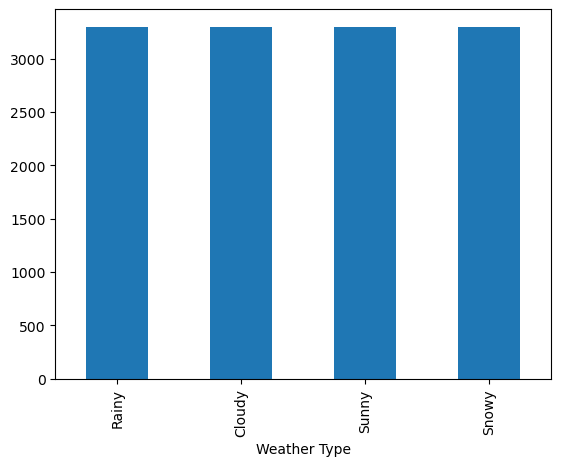

In [95]:
df['Weather Type'].value_counts(normalize=False).plot.bar()

<Axes: ylabel='proportion'>

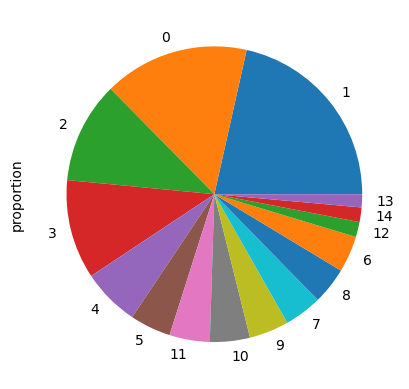

In [97]:
df['UV Index'].value_counts(normalize=True).plot.pie()

Text(0.5, 1.0, 'Тип погоды и расположение')

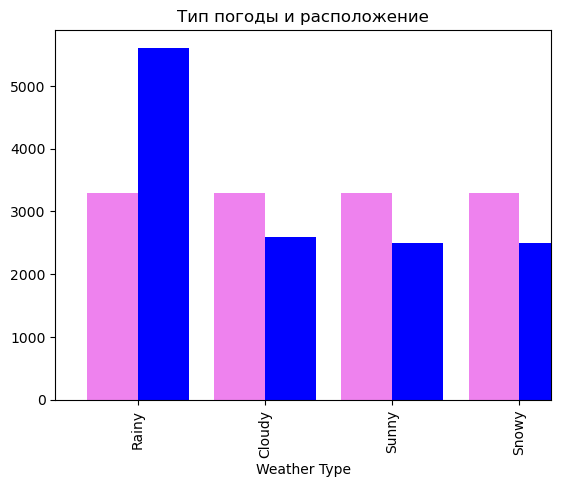

In [128]:
location_counts = df['Season'].value_counts(normalize=False)
weather_counts = df['Weather Type'].value_counts(normalize=False)

fig, ax = plt.subplots()

location_counts.plot.bar(ax=ax, position=0, width=0.4, color='blue', label='Location')

weather_counts.plot.bar(ax=ax, position=1, width=0.4, color='violet', label='Weather Type')
plt.title("Тип погоды и расположение")

<Axes: ylabel='Weather Type'>

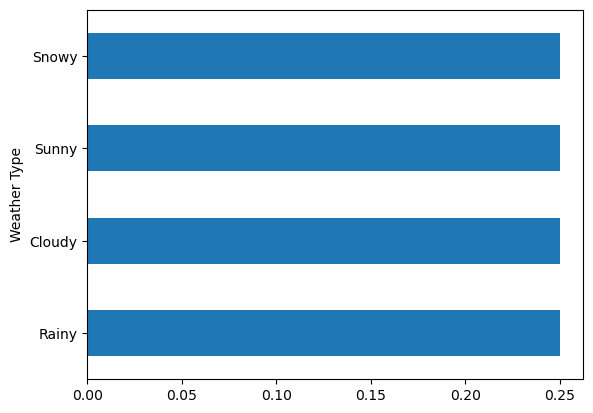

In [103]:
df['Weather Type'].value_counts(normalize=True).plot.barh()

### Гистограмма всех признаков

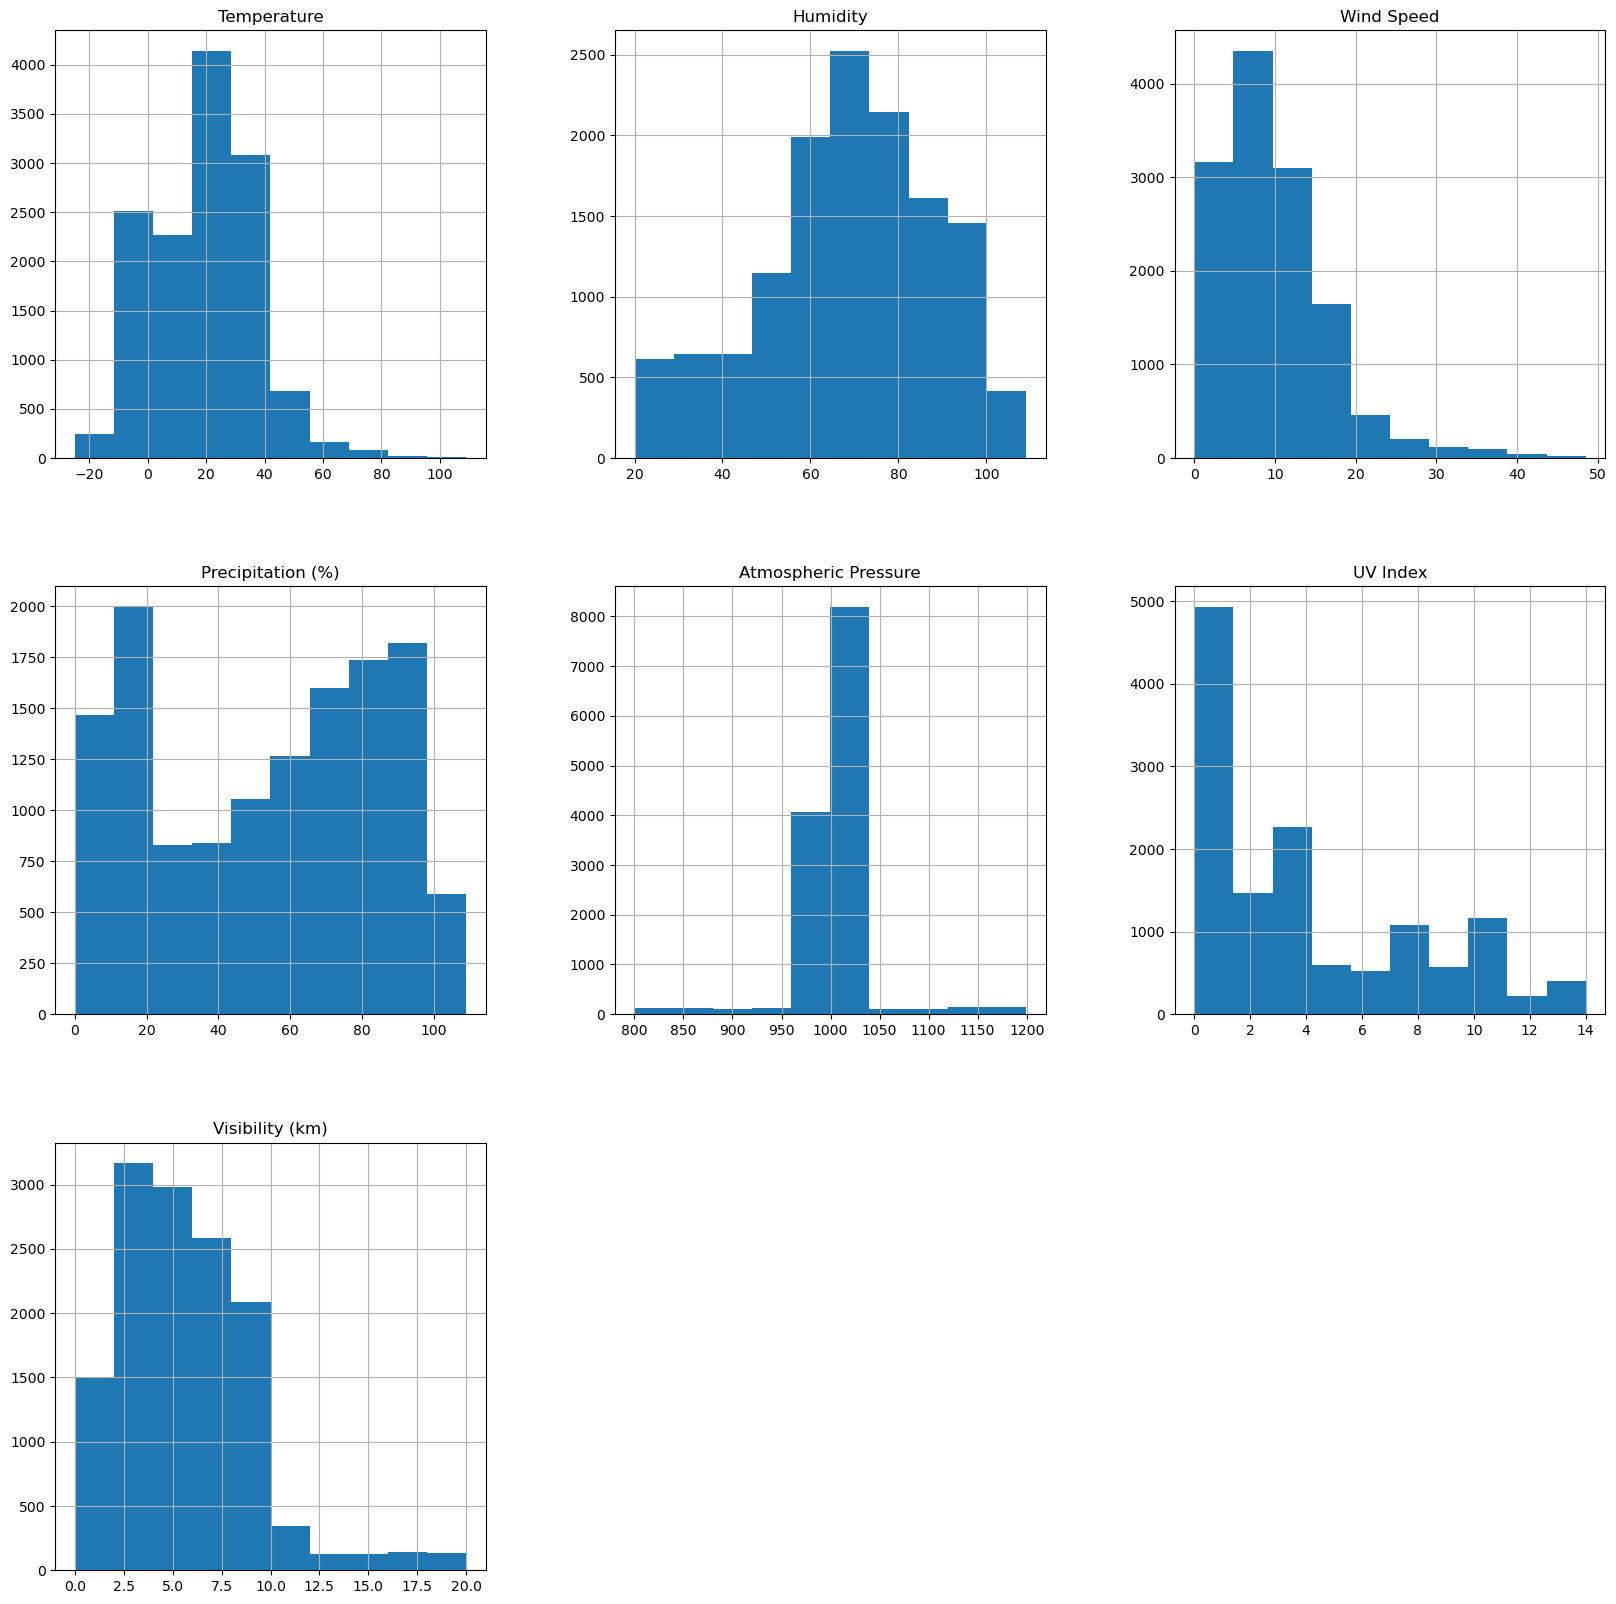

In [108]:
df.hist(figsize=(20,20));

In [115]:
df['Weather Type'].describe()

count     13200
unique        4
top       Rainy
freq       3300
Name: Weather Type, dtype: object

### Двумерный анализ признаков

In [196]:
# список признаков для анализа
two_analisis = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
               'Season_Type', 'Location_Type', 'Cloud_Cover', 'Weather_Type']

In [120]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [170]:
df['Season_Type'] = df['Season']
d = {'Winter':0, 'Spring':1, 'Autumn':2, 'Summer':3}
df['Season_Type'] = df['Season_Type'].map(d)

df['Location_Type'] = df['Location']
d = {'inland':0, 'mountain':1, 'coastal':2}
df['Location_Type'] = df['Location_Type'].map(d)

df['Cloud_Cover'] = df['Cloud Cover']
d = {'overcast':0, 'partly cloudy':1, 'clear':2, 'cloudy':3}
df['Cloud_Cover'] = df['Cloud_Cover'].map(d)

df['Weather_Type'] = df['Weather Type']
d = {'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}
df['Weather_Type'] = df['Weather_Type'].map(d)

In [179]:
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  Weather Type_num  Season_num  Season_Type  Location_Type  \
0        Rainy                 0           0            0              0   
1       Cloudy                 1           1            1              0   
2        Sunny                 2           1            1              1   
3        Sunny                 2           1            1              2   
4        Rainy                 0           0            0              1   
5       Cloudy                 1           3            3              0   
6        Snowy                 3           0            0              0   
7        Snowy                 3           0            0              0   
8        Snowy                 3           0            0              1   
9        Sunny                 2           0            0              2   

   Cloud_Cover  Weather_Type  
0            1             0  
1            1             1  
2            2             2  
3            2             2  
4            0             0  
5            0             1  
6            0             3  
7            1             3  
8            0             3  
9            2             2

In [198]:
corr = df[two_analisis].corr()
corr

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Season_Type              0.381422 -0.174724   -0.046682          -0.204950   
Location_Type            0.189524 -0.092175   -0.031476          -0.100080   
Cloud_Cover              0.354483 -0.450718   -0.267833          -0.431144   
Weather_Type            -0.407396 -0.081860   -0.172076          -0.055412   

                      Atmospheric Pressure  UV Index  Visibility (km)  \
Temperature                       0.209188  0.374773         0.250751   
Humidity                         -0.120653 -0.342694        -0.479969   
Wind Speed                       -0.077757 -0.068147        -0.311828   
Precipitation (%)                -0.177444 -0.291601        -0.457444   
Atmospheric Pressure              1.000000  0.154128         0.120182   
UV Index                          0.154128  1.000000         0.362922   
Visibility (km)                   0.120182  0.362922         1.000000   
Season_Type                       0.115970  0.206876         0.221317   
Location_Type                     0.062520  0.090593         0.104598   
Cloud_Cover                       0.151389  0.491863         0.409742   
Weather_Type                     -0.094754  0.058527         0.012547   

                      Season_Type  Location_Type  Cloud_Cover  Weather_Type  
Temperature              0.381422       0.189524     0.354483     -0.407396  
Humidity                -0.174724      -0.092175    -0.450718     -0.081860  
Wind Speed              -0.046682      -0.031476    -0.267833     -0.172076  
Precipitation (%)       -0.204950      -0.100080    -0.431144     -0.055412  
Atmospheric Pressure     0.115970       0.062520     0.151389     -0.094754  
UV Index                 0.206876       0.090593     0.491863      0.058527  
Visibility (km)          0.221317       0.104598     0.409742      0.012547  
Season_Type              1.000000       0.152329     0.196124     -0.383587  
Location_Type            0.152329       1.000000     0.103671     -0.202935  
Cloud_Cover              0.196124       0.103671     1.000000      0.101633  
Weather_Type            -0.383587      -0.202935     0.101633      1.000000

<Axes: >

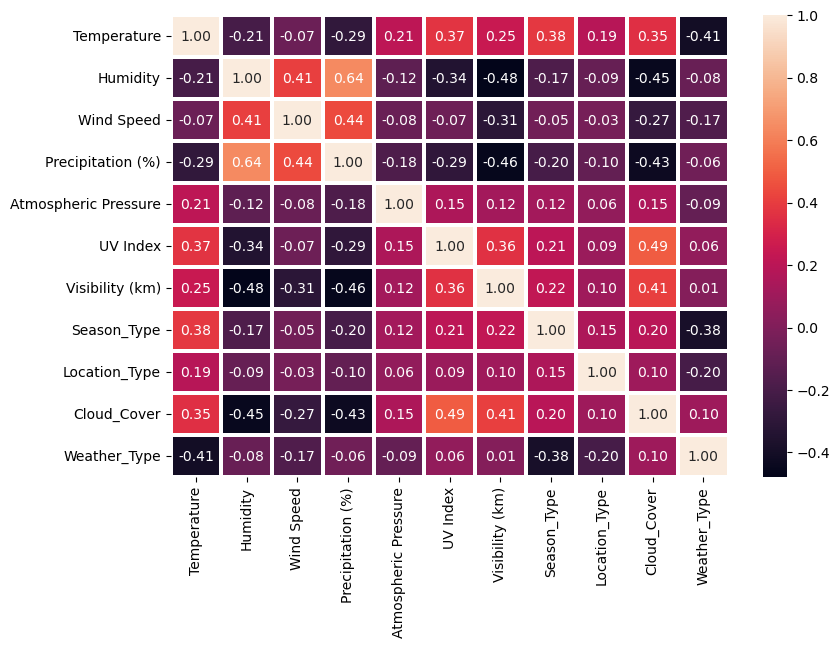

In [200]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

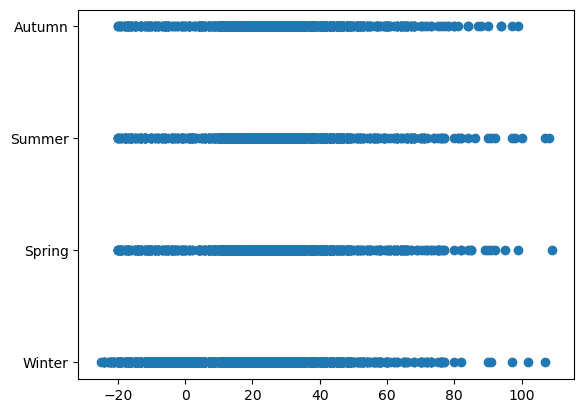

In [206]:
plt.scatter(df['Temperature'], df['Season'])

<Axes: xlabel='Temperature', ylabel='Cloud_Cover'>

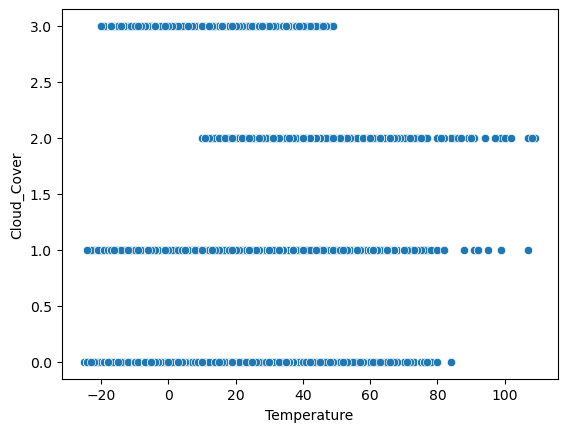

In [217]:
sns.scatterplot(data=df, x="Temperature", y="Cloud_Cover")

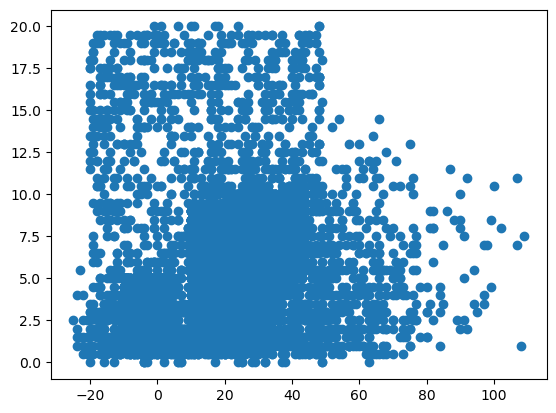

In [219]:
plt.scatter(df['Temperature'], df['Visibility (km)'])

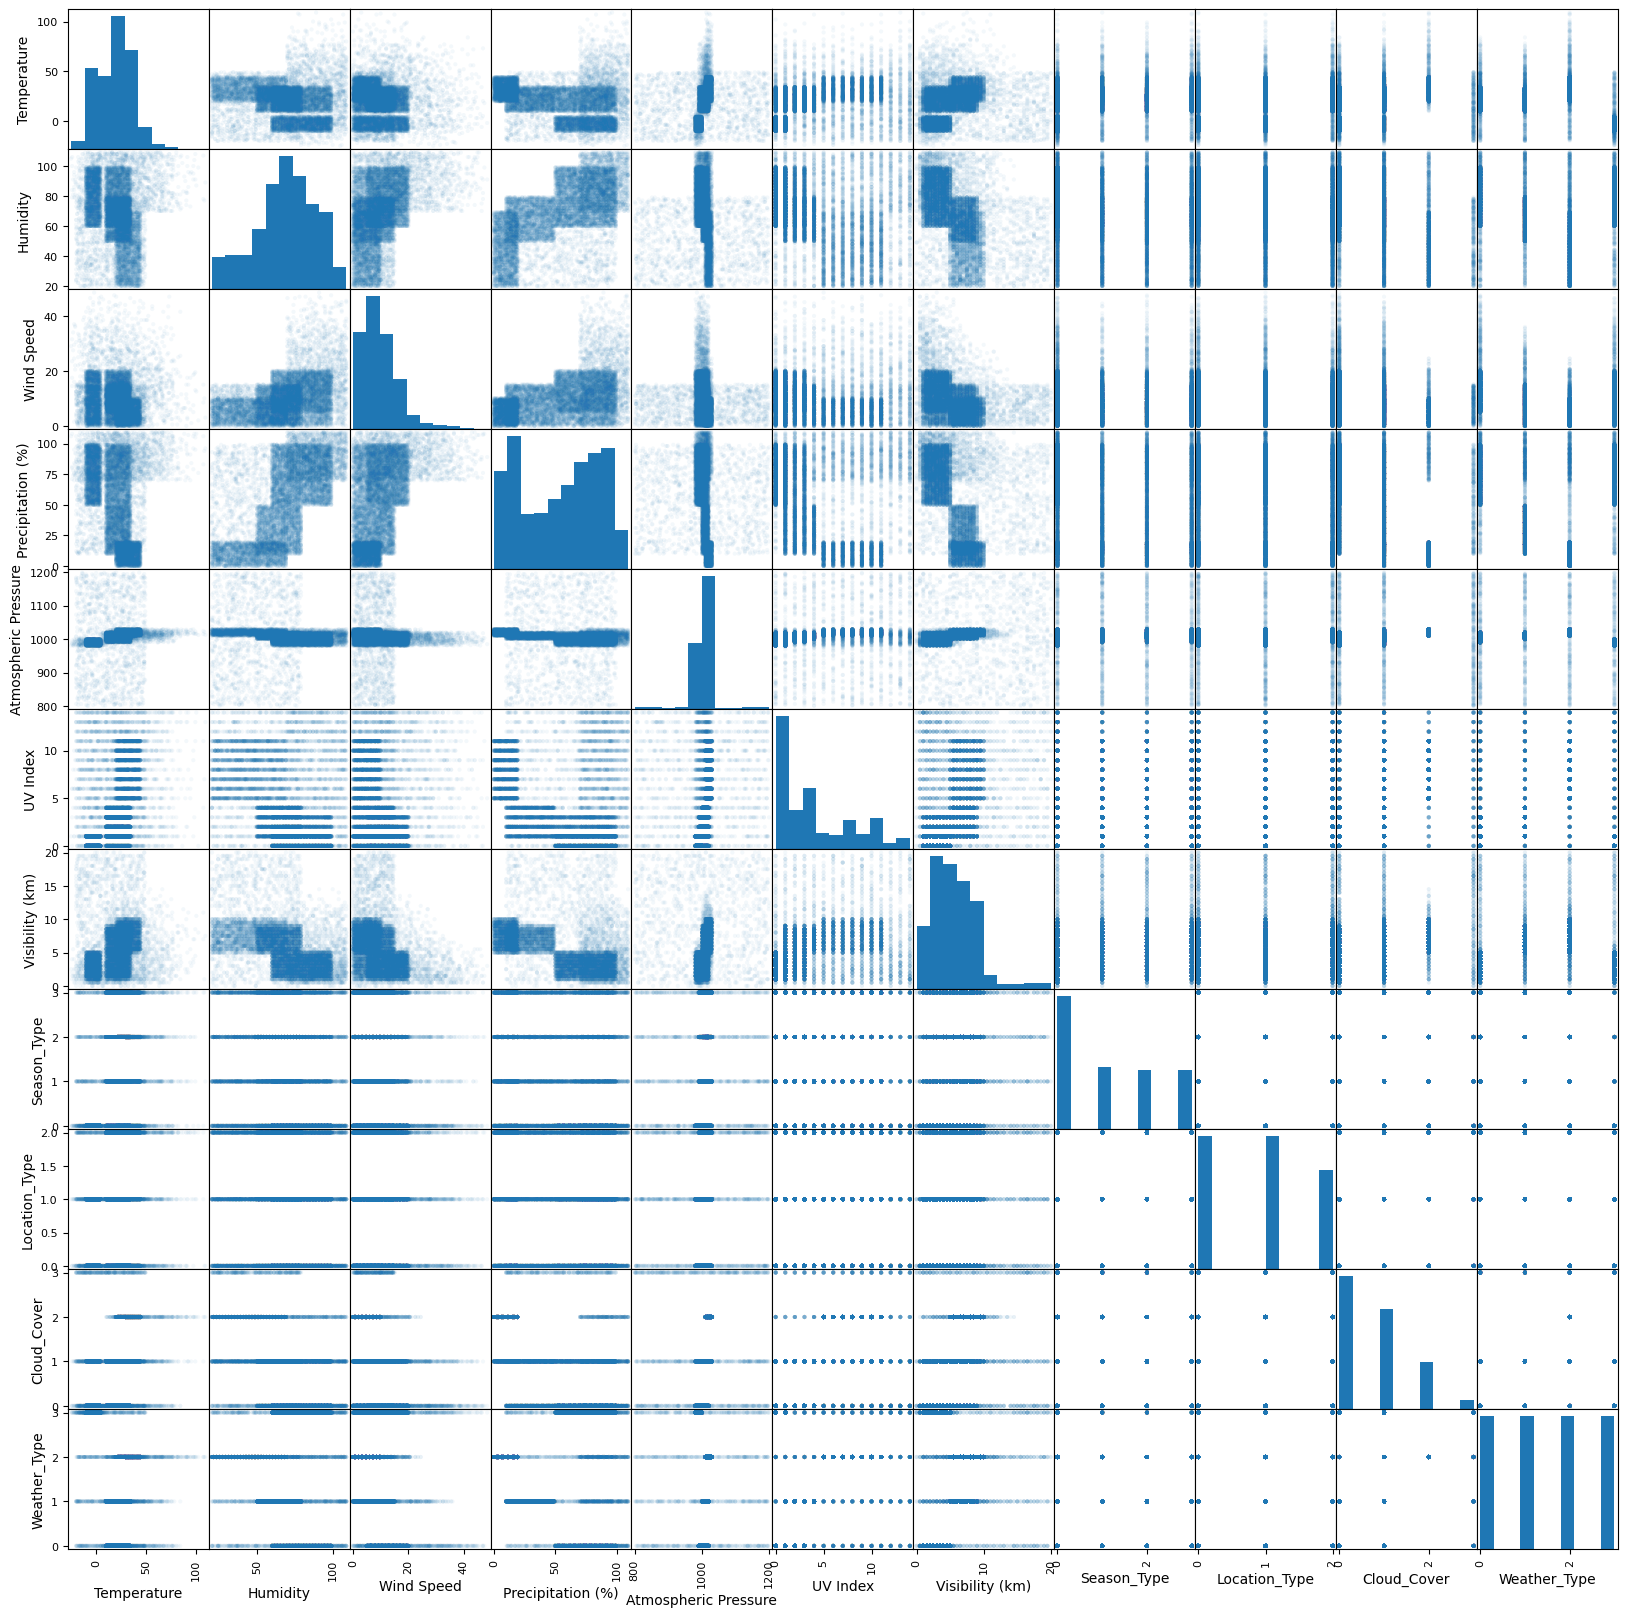

In [221]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[two_analisis], alpha=0.05, figsize=(20, 20));

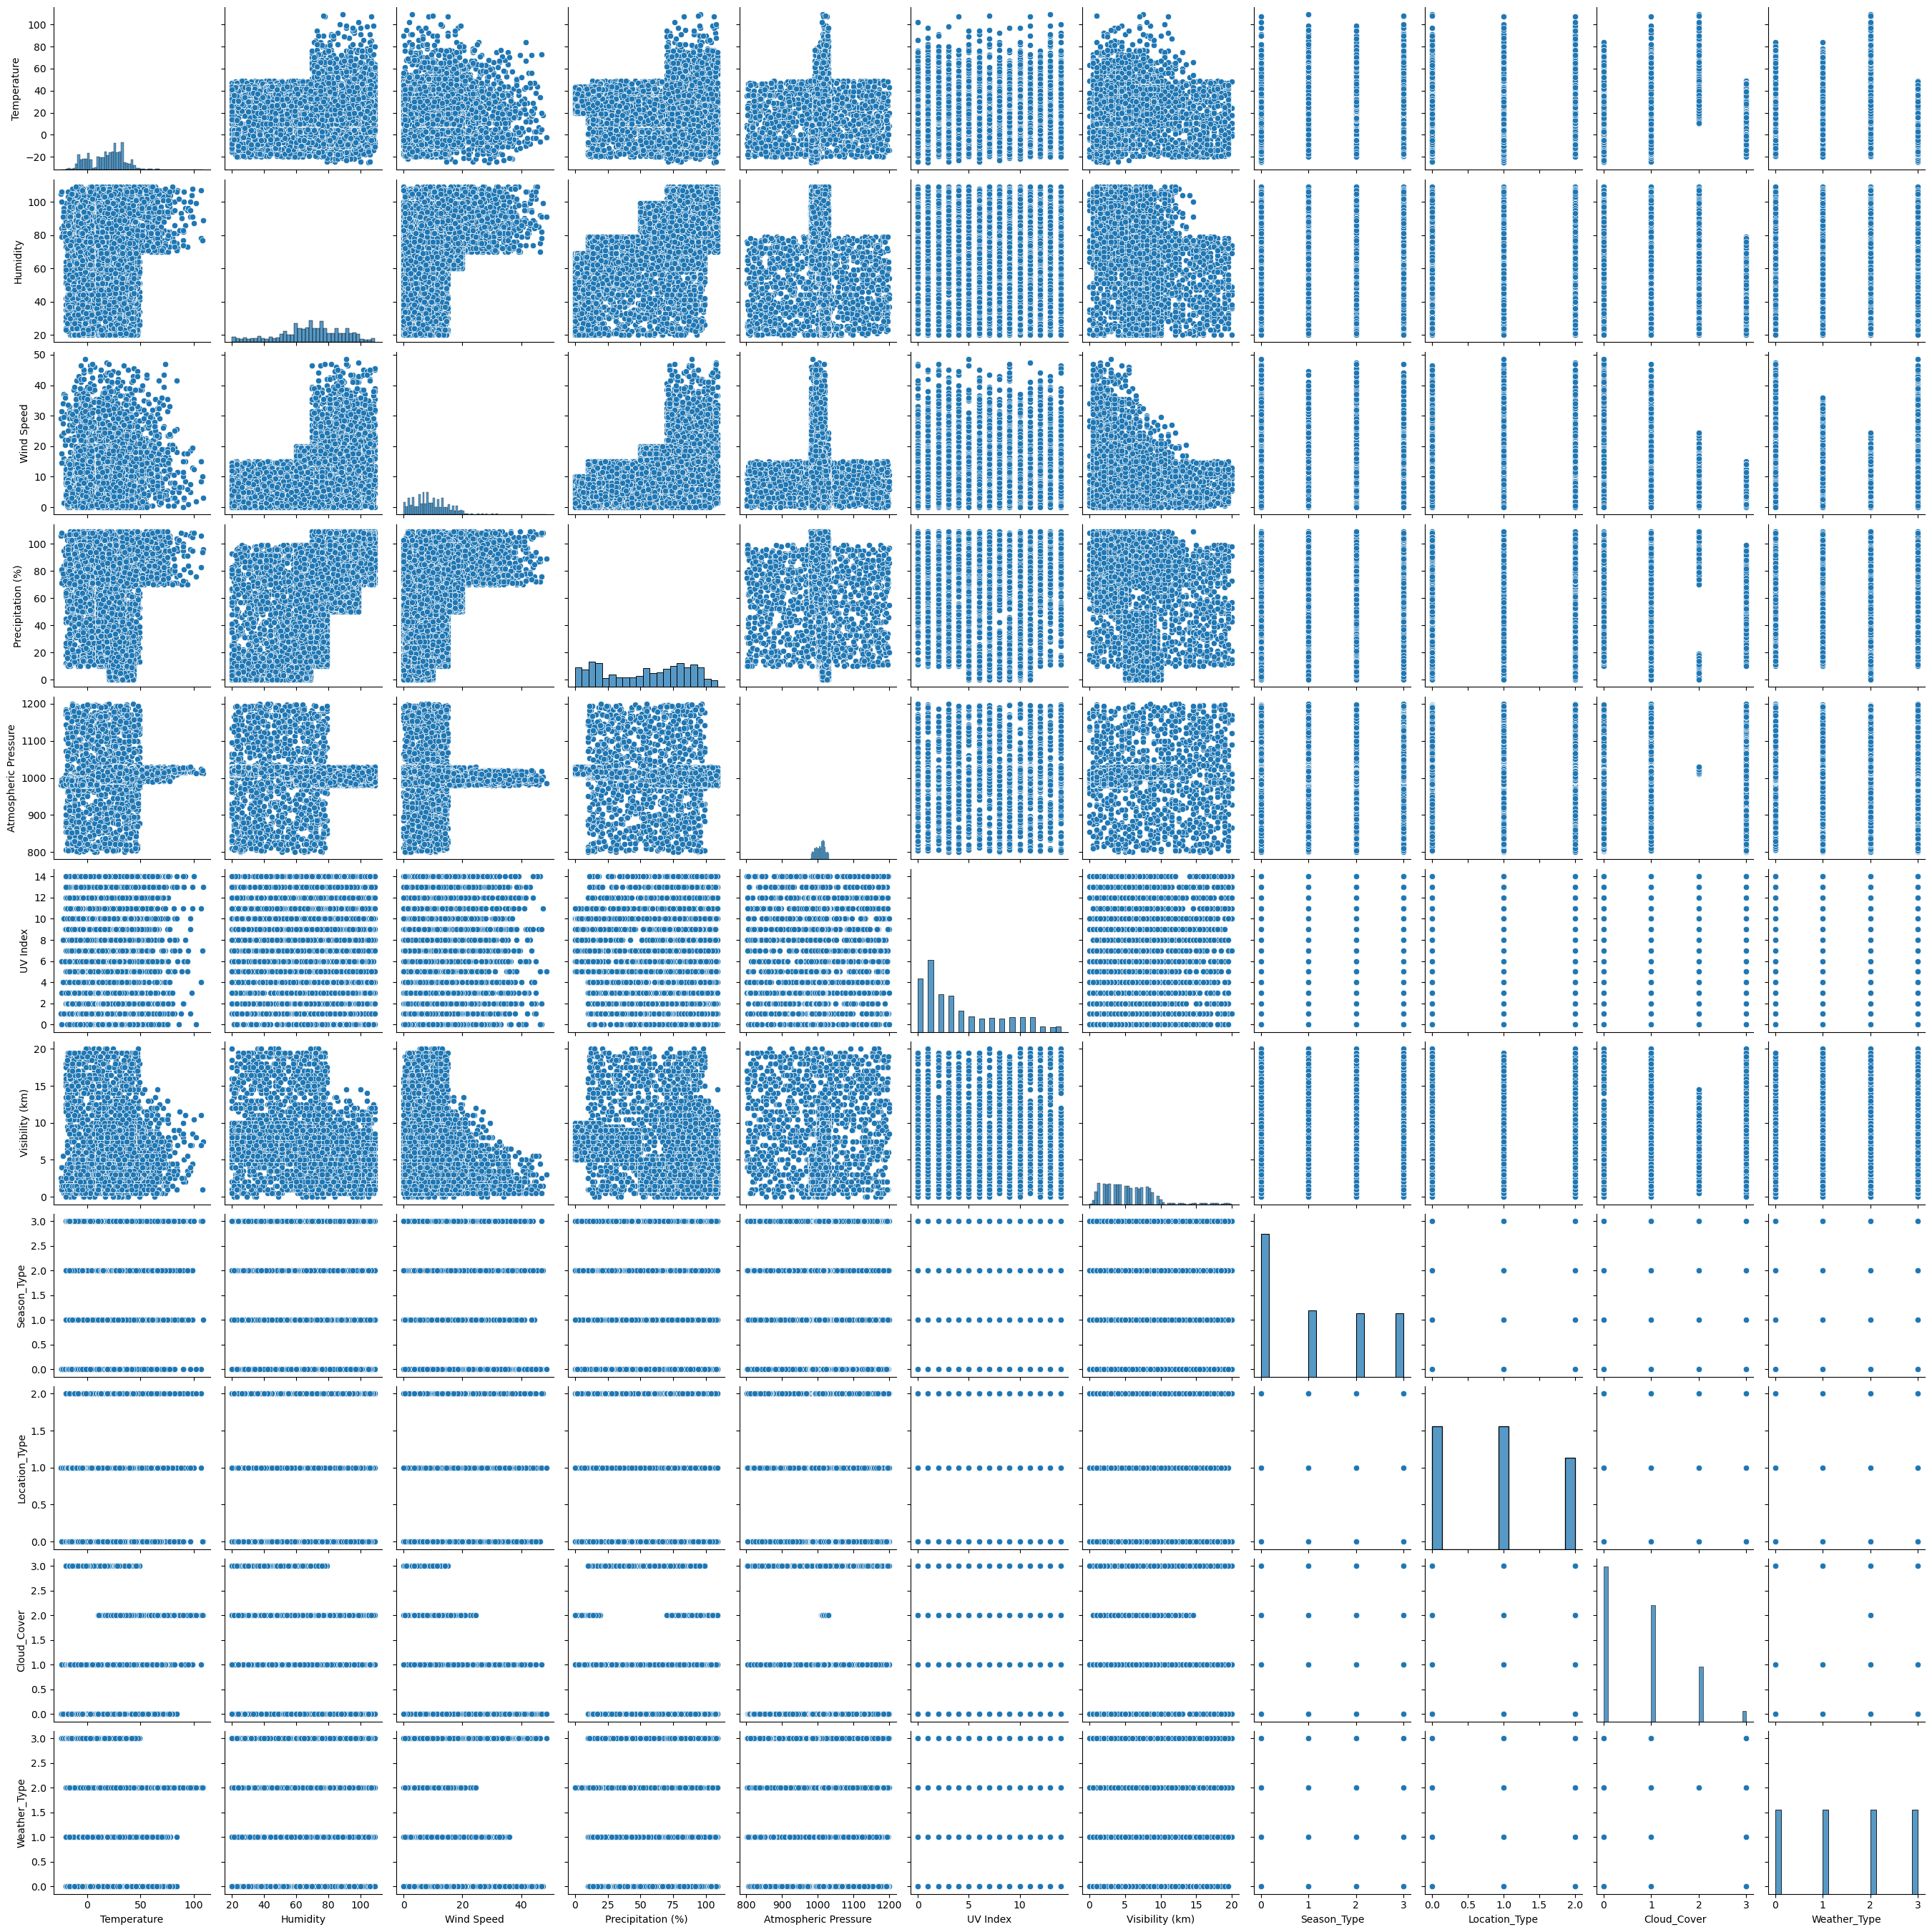

In [223]:
sns.pairplot(df[two_analisis])

<Axes: xlabel='Season', ylabel='Temperature'>

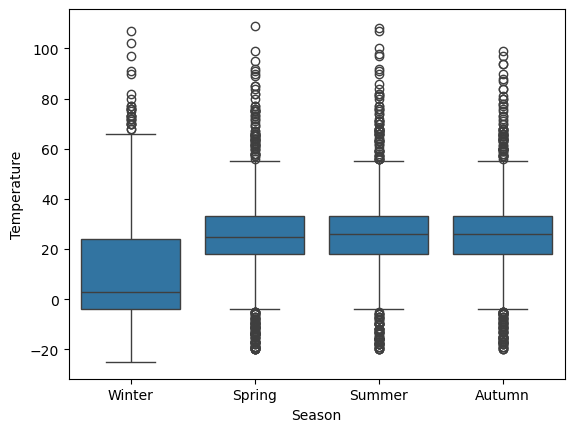

In [235]:
sns.boxplot(data=df, y="Temperature", x="Season")

<Axes: xlabel='Weather Type', ylabel='Temperature'>

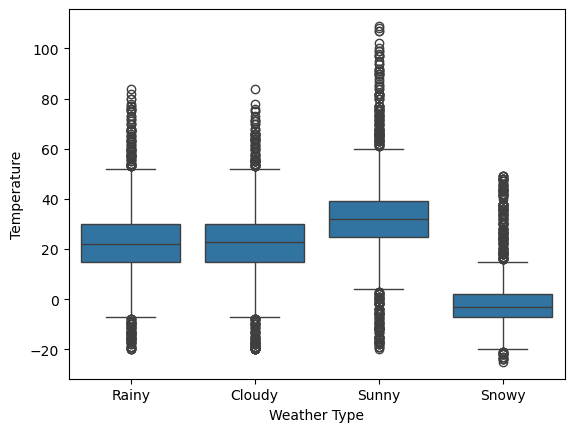

In [245]:
sns.boxplot(data=df, y="Temperature", x="Weather Type")

#'inland':0, 'mountain':1, 'coastal':2

<Axes: xlabel='Weather Type', ylabel='Location'>

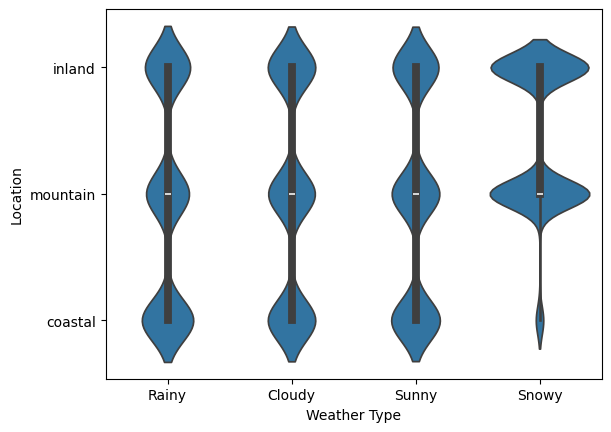

In [253]:
sns.violinplot(data=df, y="Location", x="Weather Type")

### Многомерный анализ признаков

In [275]:
result = pd.pivot_table(data=df, index='Weather_Type', columns='Location', values='Season_Type')
result

Location       coastal    inland  mountain
Weather_Type                              
0             1.448191  1.476146  1.521182
1             1.452080  1.431798  1.443422
2             1.519929  1.444131  1.594937
3             1.366667  0.075556  0.080997

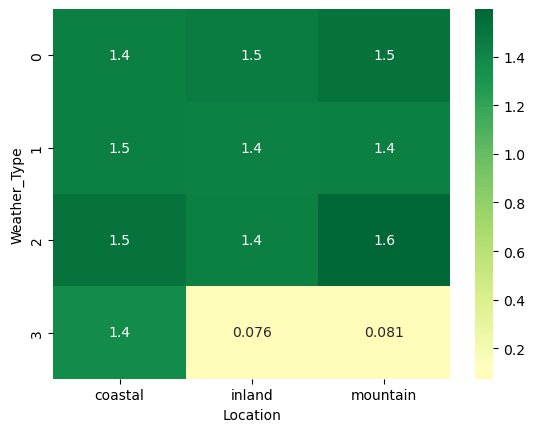

In [277]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

### Предварительная обработка данных (preprocessing)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
 11  Weather Type_num      13200 non-null  int64  
 12  Season_num            13200 non-null  int64  
 13  Season_Type           13200 non-null  int64  
 14  Location_Type         13200 non-null  int64  
 15  Cloud_Cover        

In [282]:
df.head(10)

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   
7          3.0        85         6.0               96.0  partly cloudy   
8          3.0        83         6.0               66.0       overcast   
9         28.0        74         8.5              107.0          clear   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   
7                984.46         1  Winter              3.5    inland   
8                999.44         0  Winter              1.0  mountain   
9               1012.13         8  Winter              7.5   coastal   

  Weather Type  Weather Type_num  Season_num  Season_Type  Location_Type  \
0        Rainy                 0           0            0              0   
1       Cloudy                 1           1            1              0   
2        Sunny                 2           1            1              1   
3        Sunny                 2           1            1              2   
4        Rainy                 0           0            0              1   
5       Cloudy                 1           3            3              0   
6        Snowy                 3           0            0              0   
7        Snowy                 3           0            0              0   
8        Snowy                 3           0            0              1   
9        Sunny                 2           0            0              2   

   Cloud_Cover  Weather_Type  
0            1             0  
1            1             1  
2            2             2  
3            2             2  
4            0             0  
5            0             1  
6            0             3  
7            1             3  
8            0             3  
9            2             2

### Выявление выбросов

In [289]:
numeric_columns = ['Temperature', 'Atmospheric Pressure', 'Visibility (km)', 'Precipitation (%)']

In [291]:
df[numeric_columns].describe()

Temperature  Atmospheric Pressure  Visibility (km)  Precipitation (%)
count  13200.000000          13200.000000     13200.000000       13200.000000
mean      19.127576           1005.827896         5.462917          53.644394
std       17.386327             37.199589         3.371499          31.946541
min      -25.000000            800.120000         0.000000           0.000000
25%        4.000000            994.800000         3.000000          19.000000
50%       21.000000           1007.650000         5.000000          58.000000
75%       31.000000           1016.772500         7.500000          82.000000
max      109.000000           1199.210000        20.000000         109.000000

### Формирование дата-сета для обучения моделей

In [329]:
free_analisis = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
               'Season_Type', 'Location_Type', 'Cloud_Cover', 'Weather_Type']

### Моделинг

In [352]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [354]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8844, 15) (4356, 15) (8844,) (4356,)


In [356]:
from sklearn.metrics import accuracy_score

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [360]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.